<a href="https://colab.research.google.com/github/ianlucasalmeida/Atividades_Fundamentos-2023.1/blob/main/projeto1_R(Python_version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling

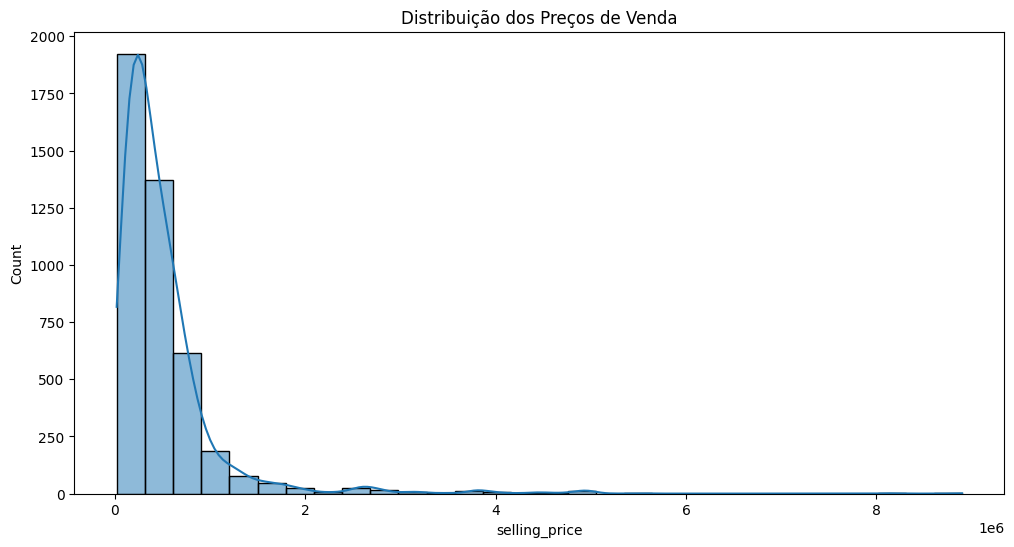

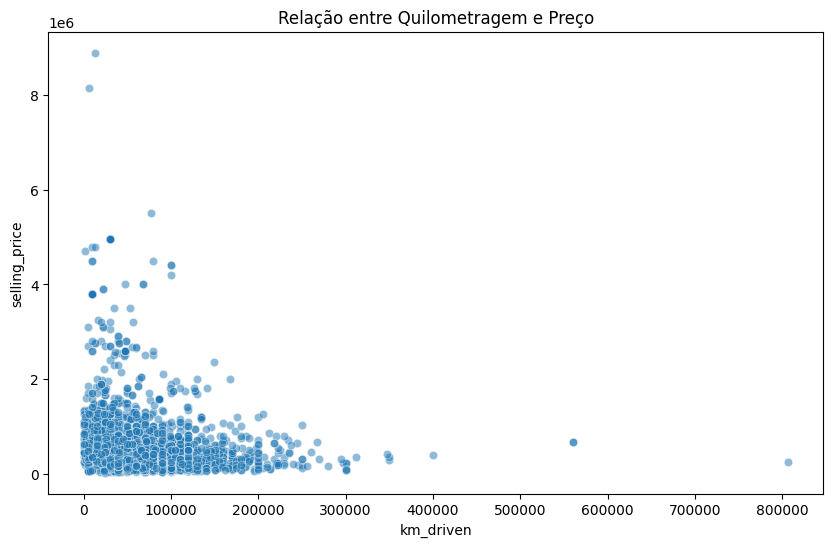

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.015e+12, tolerance: 1.187e+11
  model = cd_fast.enet_coordinate_descent(


Lasso RMSE: 426,786.67
XGBoost RMSE: 385,397.01
SVM RMSE: 568,580.81


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Rede Neural RMSE: 424,083.95


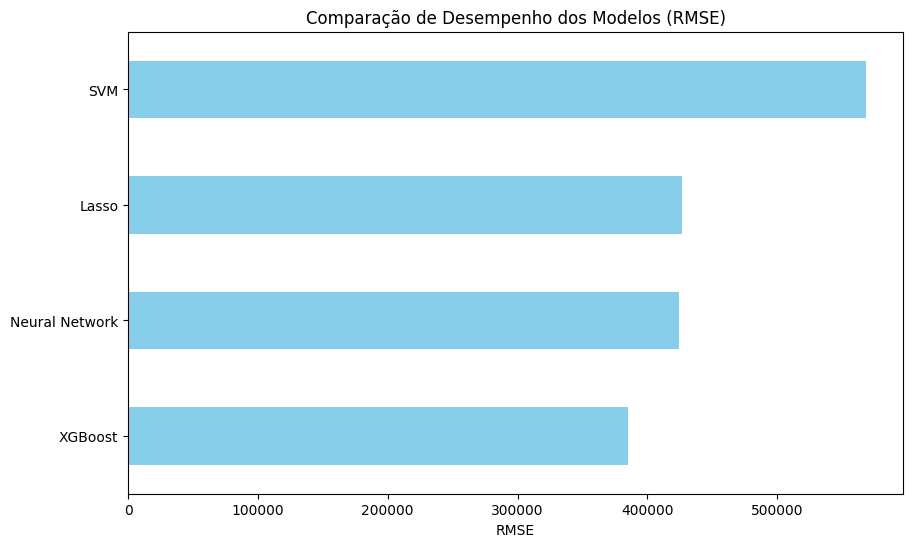

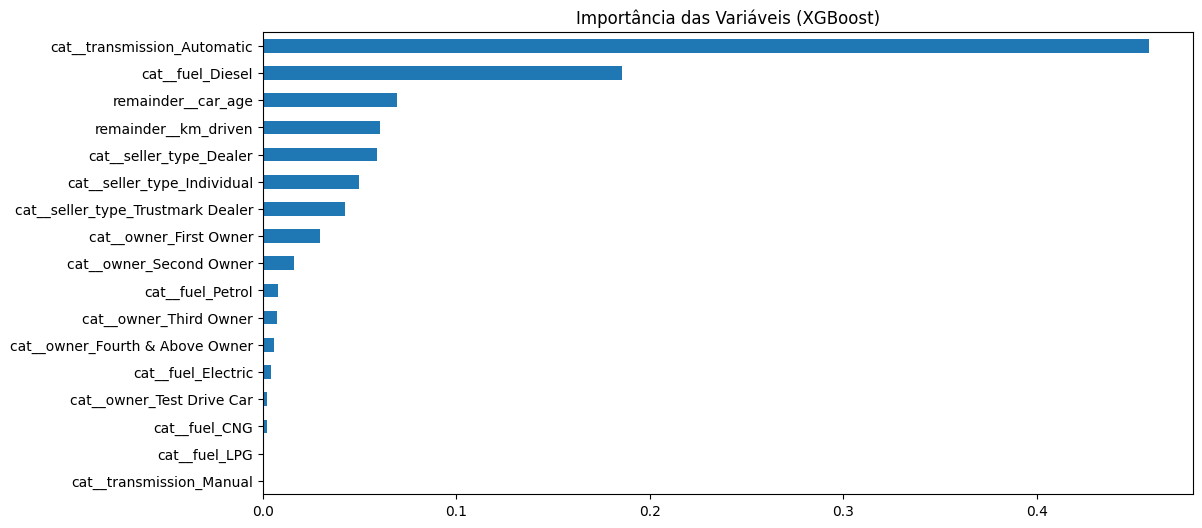

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

# 1. Carregar os dados
url = '/content/CAR DETAILS FROM CAR DEKHO.csv'  # Substitua pelo caminho correto
df = pd.read_csv(url)

# 2. Análise Exploratória
print(df.head())
print("\nInformações do dataset:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())

# Visualizações
plt.figure(figsize=(12,6))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribuição dos Preços de Venda')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='km_driven', y='selling_price', data=df, alpha=0.5)
plt.title('Relação entre Quilometragem e Preço')
plt.show()

# 3. Pré-processamento
# Converter ano para idade do carro
df['car_age'] = 2024 - df['year']

# Selecionar features relevantes
features = ['car_age', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']
target = 'selling_price'

X = df[features]
y = df[target]

# Codificação de variáveis categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['fuel', 'seller_type', 'transmission', 'owner'])
    ],
    remainder='passthrough'
)

# 4. Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Modelagem

# Função para avaliação
def evaluate_model(model, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('scaler', StandardScaler(with_mean=False)),  # Necessário para manter esparsidade
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"{model_name} RMSE: {rmse:,.2f}")
    return rmse

# Testar diferentes modelos
results = {}

# a. Regressão Lasso
results['Lasso'] = evaluate_model(Lasso(alpha=0.1), 'Lasso')

# b. XGBoost
results['XGBoost'] = evaluate_model(XGBRegressor(n_estimators=100, learning_rate=0.1), 'XGBoost')

# c. SVM
results['SVM'] = evaluate_model(SVR(C=10, kernel='rbf'), 'SVM')

# d. Rede Neural
results['Neural Network'] = evaluate_model(
    MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500),
    'Rede Neural'
)

# 6. Comparação de modelos
plt.figure(figsize=(10,6))
pd.Series(results).sort_values().plot(kind='barh', color='skyblue')
plt.title('Comparação de Desempenho dos Modelos (RMSE)')
plt.xlabel('RMSE')
plt.show()

# 7. Feature Importance (Exemplo com XGBoost)
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

pipeline_xgb.fit(X_train, y_train)

# Obter nomes das features após one-hot encoding
feature_names = pipeline_xgb.named_steps['preprocessor'].get_feature_names_out()
importances = pipeline_xgb.named_steps['model'].feature_importances_

plt.figure(figsize=(12,6))
pd.Series(importances, index=feature_names).sort_values().plot(kind='barh')
plt.title('Importância das Variáveis (XGBoost)')
plt.show()

In [4]:
!pip install dash pandas plotly

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.9 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3568 sha256=be2575ce9630e4112f0e55ea9ffef530b7487786aa20eee56777f7ce6b1db112
  Stored in directory: /root/.cache/pip/wheels/b4/33/6d/d0820be98063da218c3206fbad2381cd2db3fbb1a0f0d254b5
Successfully built stringcase
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [7]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Carregar dados
df = pd.read_csv("/content/CAR DETAILS FROM CAR DEKHO.csv")
df['car_age'] = 2024 - df['year']  # Criar coluna de idade do carro

# Inicializar o app Dash
app = dash.Dash(__name__)
server = app.server  # Para deploy em servidores

# Layout do dashboard
app.layout = html.Div([
    html.H1("Dashboard de Análise de Carros - CarDekho", style={'textAlign': 'center'}),

    # Filtros
    html.Div([
        html.Div([
            dcc.Dropdown(
                id='manufacturer-filter',
                options=[{'label': m, 'value': m} for m in df['name'].str.split().str[0].unique()],
                placeholder="Selecione a Marca",
                multi=True
            )
        ], style={'width': '30%', 'display': 'inline-block'}),

        html.Div([
            dcc.RangeSlider(
                id='year-slider',
                min=df['year'].min(),
                max=df['year'].max(),
                marks={str(year): str(year) for year in df['year'].unique() if year % 2 == 0},
                value=[df['year'].min(), df['year'].max()]
            )
        ], style={'width': '30%', 'display': 'inline-block', 'padding': '0 20px'}),

        html.Div([
            dcc.RangeSlider(
                id='km-slider',
                min=df['km_driven'].min(),
                max=df['km_driven'].max(),
                marks={0: '0 km', 100000: '100k km', 200000: '200k km', 300000: '300k km'},
                value=[df['km_driven'].min(), df['km_driven'].max()]
            )
        ], style={'width': '30%', 'display': 'inline-block'})
    ], style={'padding': '20px 0'}),

    # Gráficos
    html.Div([
        dcc.Graph(id='price-distribution'),
        dcc.Graph(id='km-vs-price'),
        dcc.Graph(id='fuel-type-pie')
    ], style={'columnCount': 1}),

    # Tabela interativa
    html.Div([
        html.H3("Dados Filtrados"),
        html.Div(id='filtered-table', style={'height': '300px', 'overflowY': 'scroll'})
    ])
])

# Callbacks para interatividade
@app.callback(
    [Output('price-distribution', 'figure'),
     Output('km-vs-price', 'figure'),
     Output('fuel-type-pie', 'figure'),
     Output('filtered-table', 'children')],
    [Input('manufacturer-filter', 'value'),
     Input('year-slider', 'value'),
     Input('km-slider', 'value')]
)
def update_dashboard(selected_manufacturers, selected_years, selected_km):
    # Aplicar filtros
    filtered_df = df[
        (df['year'].between(selected_years[0], selected_years[1])) &
        (df['km_driven'].between(selected_km[0], selected_km[1]))
    ]

    if selected_manufacturers:
        filtered_df = filtered_df[filtered_df['name'].str.split().str[0].isin(selected_manufacturers)]

    # Gráfico 1: Distribuição de Preços
    fig1 = px.histogram(
        filtered_df,
        x='selling_price',
        nbins=30,
        title='Distribuição de Preços',
        labels={'selling_price': 'Preço (R$)'}
    )

    # Gráfico 2: Quilometragem vs Preço
    fig2 = px.scatter(
        filtered_df,
        x='km_driven',
        y='selling_price',
        color='fuel',
        title='Quilometragem vs Preço',
        labels={'km_driven': 'Quilometragem', 'selling_price': 'Preço (R$)'}
    )

    # Gráfico 3: Distribuição por Tipo de Combustível
    fig3 = px.pie(
        filtered_df,
        names='fuel',
        title='Distribuição por Tipo de Combustível',
        hole=0.4
    )

    # Tabela
    table = dash.dash_table.DataTable(
        data=filtered_df.to_dict('records'),
        columns=[{'name': col, 'id': col} for col in filtered_df.columns],
        page_size=10,
        style_table={'overflowX': 'auto'}
    )

    return fig1, fig2, fig3, table

# Executar o app
if __name__ == '__main__':
    app.run(debug=True, port=8050)

<IPython.core.display.Javascript object>